Лабораторная работа № 3 по Нейроинформатике

Многослойные сети. Алгоритм обратного распространения ошибки

Выполнила: Тимофеева Наталья М8О-408Б-19

Вариант № 16

Часть 2

Аппроксимация

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from matplotlib import pyplot as plt
from timeit import default_timer as timer

In [18]:
def fun(t):
    return np.sin(np.sin(t) * t ** 2 + 3 * t - 10)

Создание модели

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(40, input_dim = 1, activation='tanh'))
model.add(keras.layers.Dense(12, activation='tanh'))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

In [20]:
t1 = np.linspace(0, 3.5, 100)
y1 = fun(t1)

Обучение модели

In [21]:
epochs = 2500
batch_size = 7

time_start = timer()
hist = model.fit(t1, y1, batch_size = batch_size, epochs = epochs)
time_end = timer()

Epoch 1/2500
15/15 [==============================] - 0s 1ms/step - loss: 0.5115 - mae: 0.6307
Epoch 2/2500
15/15 [==============================] - 0s 977us/step - loss: 0.4937 - mae: 0.6257
Epoch 3/2500
15/15 [==============================] - 0s 861us/step - loss: 0.4764 - mae: 0.6183
Epoch 4/2500
15/15 [==============================] - 0s 894us/step - loss: 0.4803 - mae: 0.6156
Epoch 5/2500
15/15 [==============================] - 0s 784us/step - loss: 0.4668 - mae: 0.6110
Epoch 6/2500
15/15 [==============================] - 0s 998us/step - loss: 0.4746 - mae: 0.6155
Epoch 7/2500
15/15 [==============================] - 0s 1ms/step - loss: 0.4669 - mae: 0.6102
Epoch 8/2500
15/15 [==============================] - 0s 984us/step - loss: 0.4673 - mae: 0.6126
Epoch 9/2500
15/15 [==============================] - 0s 1000us/step - loss: 0.4734 - mae: 0.6202
Epoch 10/2500
15/15 [==============================] - 0s 1ms/step - loss: 0.4553 - mae: 0.6055
Epoch 11/2500
15/15 [=============

In [22]:
print('Эпох: {0}'.format(epochs))
print('Время обучения: {0} секунд'.format(int(time_end - time_start)))
print('Функция потерь MSE: {0}'.format(min(hist.history['loss'])))
print('Метрика качества MAE: {0}'.format(min(hist.history['mae'])))

Эпох: 2500
Время обучения: 54 секунд
Функция потерь MSE: 0.00021155335707589984
Метрика качества MAE: 0.010877574793994427


Выводим с помощью обученной модели точки с меньшим шагом

In [23]:
t2 = np.linspace(0, 3.5, 2000)
y2 = model.predict(t2)
real_y = fun(t2)


63/63 [==============================] - 0s 724us/step


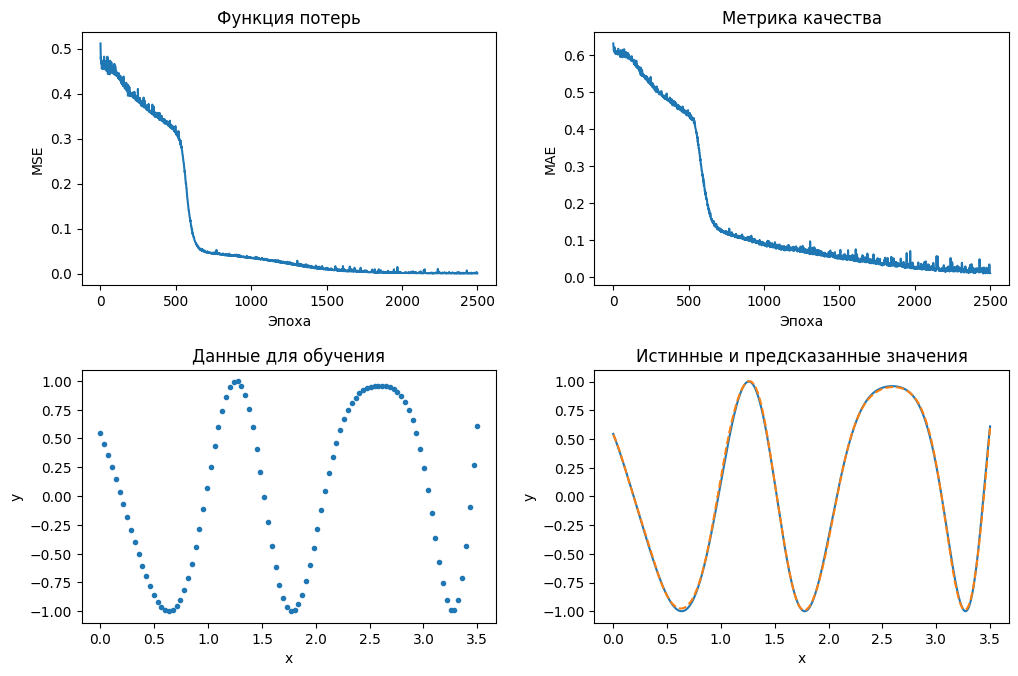

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6.5))
fig.tight_layout(h_pad = 4, w_pad = 4)

axes[0, 0].set_title('Функция потерь')
axes[0, 0].set_xlabel('Эпоха')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].plot(hist.history['loss'])

axes[0, 1].set_title('Метрика качества')
axes[0, 1].set_xlabel('Эпоха')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].plot(hist.history['mae'])

axes[1, 0].set_title('Данные для обучения')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('y')
axes[1, 0].plot(t1, y1, '.')

axes[1, 1].set_title('Истинные и предсказанные значения')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('y')
axes[1, 1].plot(t2, real_y)
axes[1, 1].plot(t2, y2, '--')